In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests

In [3]:
%matplotlib inline

In [4]:
# Consctructors data files - as am finding number of victories per constructor
# Study data files
constructors = "Resources/constructors.csv"
constructor_results = "Resources/constructor_results.csv"
constructor_standings = "Resources/constructor_standings.csv"

In [5]:
# Read the data and the study results
constructors = pd.read_csv(constructors, delimiter=",")
constructor_results = pd.read_csv(constructor_results, delimiter=",")
constructor_standings = pd.read_csv(constructor_standings, delimiter=",")


In [6]:
first = pd.merge(constructors, constructor_results, how='left', on=['constructorId','constructorId'],suffixes= ("_constructors", "_constructor_results"))
all = pd.merge(first, constructor_standings, how='left', on=['constructorId','constructorId'], suffixes=("_first","_constructor_standings"))
constructors_main_df = pd.DataFrame(all)
#constructors_main_df.head()


In [7]:
# Getting the duplicate and cleaning the data
duplicate_rows = constructors_main_df[constructors_main_df.duplicated(['constructorId','name'])]
duplicate_rows
clean_df = constructors_main_df.drop_duplicates("constructorId")
clean_df

,constructorId,constructorRef,name,nationality,url,constructorResultsId,raceId_first,points_first,status,constructorStandingsId,raceId_constructor_standings,points_constructor_standings,position,positionText,wins
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1.0,18.0,14.0,\N,1.0,18.0,14.0,1.0,1,1.0
704760,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,2.0,18.0,8.0,\N,2.0,18.0,8.0,3.0,3,0.0
709730,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,3.0,18.0,9.0,\N,3.0,18.0,9.0,2.0,2,0.0
1288034,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,4.0,18.0,5.0,\N,4.0,18.0,5.0,4.0,4,0.0
1451652,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,5.0,18.0,2.0,\N,5.0,18.0,2.0,5.0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081145,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport,15032.0,927.0,0.0,\N,26158.0,927.0,0.0,10.0,10,0.0
4082666,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,15212.0,948.0,8.0,\N,26561.0,948.0,8.0,5.0,5,0.0
4092766,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team,15856.0,1010.0,2.0,\N,27199.0,1010.0,2.0,7.0,7,0.0
4094210,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,16064.0,1031.0,6.0,\N,27517.0,1034.0,13.0,7.0,7,0.0


In [8]:
#cleaning data with different option to see if there are any other relation
constructor_count = clean_df.groupby("name")["constructorResultsId"].unique()
constructor_df = pd.DataFrame({"No. of position": constructor_count})
constructor_df

,No. of position
name,
AFM,[nan]
AGS,[3250.0]
ATS,[5285.0]
Adams,[nan]
Alfa Romeo,[5048.0]
...,...
Watson,[10013.0]
Wetteroth,[nan]
Williams,[3.0]


In [9]:
#Arranging the data 
constructor_post_df = constructor_df.sort_values("No. of position", ascending = True)
constructor_post_df.head(10)

,No. of position
name,
AFM,[nan]
McLaren,[1.0]
Williams,[3.0]
Renault,[4.0]
Toro Rosso,[5.0]
Toyota,[7.0]
Super Aguri,[8.0]
Red Bull,[9.0]
Spyker,[195.0]


In [10]:
# clearing the unwanted row
constructor_position_df = constructor_post_df.drop(constructor_post_df.index[0])
constructor_position_df.head(6)

,No. of position
name,
McLaren,[1.0]
Williams,[3.0]
Renault,[4.0]
Toro Rosso,[5.0]
Toyota,[7.0]
Super Aguri,[8.0]


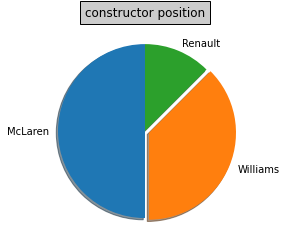

In [11]:
#figure(1, figsize=(6,6))
#ax = axes([0.1, 0.3, 0.4])

# The slices will be ordered and plotted counter-clockwise.
labels = ['McLaren', 'Williams', 'Renault']
fracs = [40, 30, 10]
explode=(0, 0.05, 0)

plt.pie(fracs, explode=explode, labels=labels,shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

plt.title('constructor position', bbox={'facecolor':'0.8', 'pad':5})

plt.show()

In [12]:
#Group data frame

# Counting/calculating points count by each constructor name

constructor_standings = clean_df.groupby("name")["constructorStandingsId"].count()
constructor_standings

# write from to the new dataframe
constructor_standings_df = pd.DataFrame({"constructorStandingsId": constructor_standings})
constructor_standings_df

## Calculating Average Purchase Price by each gender
avg_points = clean_df.groupby("name")["points_constructor_standings"].mean()
avg_points_df = pd.DataFrame({"points_constructor_standings": avg_points})
avg_points_df

# Calculate total Purchase Price by each gender
total_wins = clean_df.groupby("name")["wins"].sum()
total_wins_df = pd.DataFrame({"wins": total_wins})
total_wins_df

summary_df = pd.DataFrame({"constructorStandingsId": constructor_standings,"points_constructor_standings": avg_points,"wins": total_wins})
sort_by_total = summary_df.sort_values("points_constructor_standings", ascending = True)
sort_by_total = summary_df.reset_index()
summary_df
#summary_df.columns = [["constructorStandingsId","constructor_standings", points_constructor_standings","position	","wins"]]


,constructorStandingsId,points_constructor_standings,wins
name,,,
AFM,0,NaN,0.0
AGS,1,0.0,0.0
ATS,1,0.0,0.0
Adams,0,NaN,0.0
Alfa Romeo,1,0.0,0.0
...,...,...,...
Watson,0,NaN,0.0
Wetteroth,0,NaN,0.0
Williams,1,9.0,0.0


In [13]:
# determining the name of the file 
standings_file = 'standings.xlsx'
  
# saving the excel 
summary_df.to_excel(standings_file) 